In [1]:
import pickle
import numpy as np
import pysal as ps
from scipy import sparse

from datetime import date
from datetime import timedelta

import pandas as pd
from pandas import TimeGrouper

import matplotlib.pyplot as plt

In [2]:
def printGrids(periodsAhead):
    %matplotlib inline
    colors = ['#e6194b','#3cb44b','#ffe119','#0082c8','#f58231','#911eb4' ,'#46f0f0','#f032e6','#d2f53c','#008080','#e6beff','#aa6e28','#800000','#aaffc3','#808000','#fabebe','#ffd8b1','#000080','#808080','#000000']
    plt.close('all')
    fig, ax = plt.subplots(1, 3, figsize=(18,5), sharey=True)
    i = 0
    for result in results_mm_grid:
        ax[0].set_ylabel('fractions of crimes avoided')
        ax[0].plot(result, color=colors[i], alpha = 0.85)
        ax[0].legend()
        i += 1
    i = 0
    for result in results_ar_grid:
        ax[1].set_xlabel('Available resources')
        ax[1].set_title('{} week(s) ahead grid results'.format(periodsAhead))
        ax[1].plot(result, color=colors[i], alpha = 0.85)
        ax[1].legend()
        i += 1
    i = 0
    for result in results_h_grid:
        ax[2].plot(result, color=colors[i], alpha = 0.85)
        ax[2].legend()
        i+= 1
    midpoint = i
    for result in results_mm_grid_1:
        print(result)
        ax[0].set_ylabel('fractions of crimes avoided')
        ax[0].plot(result, color=colors[i], alpha = 0.85, marker='.')
        ax[0].legend()
        i += 1
    i = midpoint
    for result in results_ar_grid_1:
        ax[1].set_xlabel('Available resources')
        ax[1].set_title('{} week(s) ahead grid results'.format(periodsAhead))
        ax[1].plot(result, color=colors[i], alpha = 0.85, marker='.')
        ax[1].legend()
        i += 1
    i = midpoint
    for result in results_h_grid_1:
        ax[2].plot(result, color=colors[i], alpha = 0.85, marker='.')
        ax[2].legend()
        i += 1
    plt.savefig('results/grid/{}week_grids.svg'.format(periodsAhead))
    plt.savefig('results/grid/{}week_grids.png'.format(periodsAhead), dpi=300)

In [7]:
periodsAhead = 16

[315, 259, 234, 221, 201, 185, 169, 144]
0       0.000000
100     0.348894
200     0.528803
300     0.706917
400     0.805330
500     0.817886
600     0.939381
700     0.950369
800     0.950373
900     0.979863
1000    0.980910
1100    0.980910
1500    0.999311
Name: mm (0), dtype: float64
0       0.000000
100     0.348894
200     0.536463
300     0.715844
400     0.810461
500     0.900661
600     0.950343
700     0.950373
800     0.980815
900     0.980910
1000    0.996715
1100    0.997078
1500    0.999909
Name: mm (250), dtype: float64
0       0.000000
100     0.348894
200     0.536678
300     0.712891
400     0.817425
500     0.934083
600     0.950240
700     0.979084
800     0.980910
900     0.991852
1000    0.997078
1100    0.997078
1500    0.999995
Name: mm (500), dtype: float64
0       0.000000
100     0.357377
200     0.659632
300     0.911693
400     0.955614
500     0.990240
600     0.997259
700     0.999380
800     0.999423
900     0.999677
1000    0.999677
1100    0.999677
1

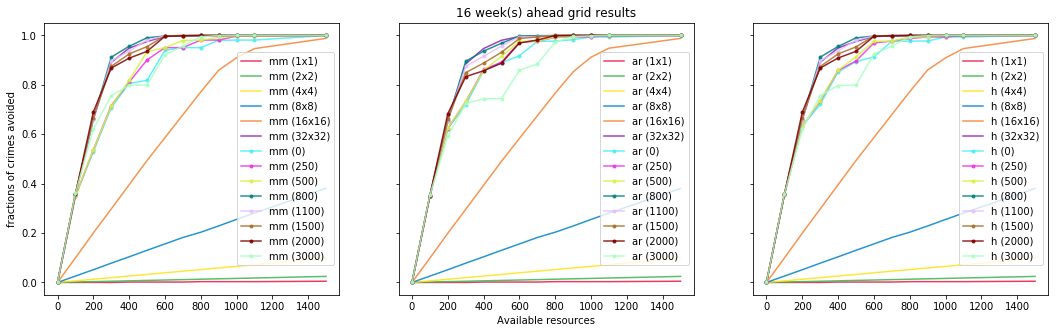

In [8]:
pkl_file = open('results/grid/grid_{}ahead.pkl'.format(periodsAhead), 'rb')
results_mm_grid, results_ar_grid, results_h_grid = pickle.load(pkl_file)

pkl_file_1 = open('results/cluster/cluster_{}ahead.pkl'.format(periodsAhead), 'rb')
results_mm_grid_1, results_ar_grid_1, results_h_grid_1, count_mm_cluster, count_ar_cluster, count_h_cluster = pickle.load(pkl_file_1)
print(count_mm_cluster)
printGrids(periodsAhead)

In [5]:
periodsAhead = 1

In [6]:
pkl_file = open('results/grid/grid_{}ahead.pkl'.format(periodsAhead), 'rb')
results_mm_grid, results_ar_grid, results_h_grid = pickle.load(pkl_file)

pkl_file_1 = open('results/cluster/cluster_{}ahead.pkl'.format(periodsAhead), 'rb')
results_mm_grid_1, results_ar_grid_1, results_h_grid_1 = pickle.load(pkl_file_1)
printGrids(periodsAhead)

ValueError: too many values to unpack (expected 3)

In [ ]:
periodsAhead = 64

In [13]:
pkl_file = open('results/grid/grid_{}ahead.pkl'.format(periodsAhead), 'rb')
results_mm_grid, results_ar_grid, results_h_grid = pickle.load(pkl_file)

pkl_file_1 = open('results/cluster/cluster_{}ahead.pkl'.format(periodsAhead), 'rb')
results_mm_grid_1, results_ar_grid_1, results_h_grid_1 = pickle.load(pkl_file_1)
printGrids(periodsAhead)

ValueError: too many values to unpack (expected 3)